#Question 1: Apply Harris Corner

In [ ]:
import numpy as np
import cv2

image = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1]
], dtype=np.float32)

# kernels for gradient computation
kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

# image gradients
Ix = cv2.filter2D(image, -1, kx)
Iy = cv2.filter2D(image, -1, ky)

# products of derivatives
Ixx = Ix ** 2
Iyy = Iy ** 2
Ixy = Ix * Iy

# sum of products of derivatives at each pixel
k = 0.04
window_size = 3
offset = window_size // 2
height, width = image.shape
R = np.zeros_like(image)

for y in range(offset, height - offset):
    for x in range(offset, width - offset):
        Sxx = np.sum(Ixx[y - offset:y + offset + 1, x - offset:x + offset + 1])
        Syy = np.sum(Iyy[y - offset:y + offset + 1, x - offset:x + offset + 1])
        Sxy = np.sum(Ixy[y - offset:y + offset + 1, x - offset:x + offset + 1])

        # the determinant and trace of the matrix
        det = (Sxx * Syy) - (Sxy ** 2)
        trace = Sxx + Syy
        R[y, x] = det - k * (trace ** 2)

corners = R > 0.01 * R.max()
marked_image = np.copy(image)
marked_image[corners] = 255

print("Harris Corner Detector Response:\n", R)


Harris Corner Detector Response:
 [[   0.      0.      0.      0.      0.      0.      0.  ]
 [   0.   -116.64 -116.64   87.96  141.24    3.      0.  ]
 [   0.   -116.64 -116.64  445.44  577.56  141.24    0.  ]
 [   0.    -29.16  -29.16  390.56  445.44   87.96    0.  ]
 [   0.      0.      0.    -29.16 -116.64 -116.64    0.  ]
 [   0.      0.      0.    -29.16 -116.64 -116.64    0.  ]
 [   0.      0.      0.      0.      0.      0.      0.  ]]


#Question 2: Image Segmentation Techniques

##K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


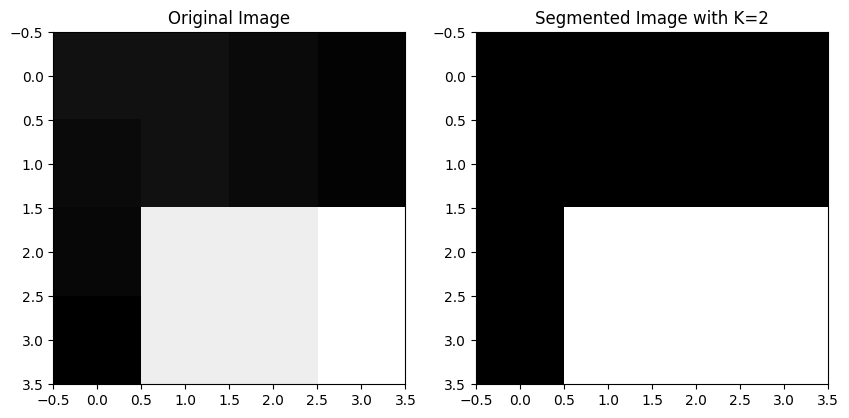

Random centers: [[ 4.799999]
 [71.66667 ]]
Iterations: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = np.array([
    [7, 7, 5, 3],
    [5, 7, 5, 3],
    [4, 70, 70, 75],
    [2, 70, 70, 75]
], dtype=np.float32)

# Reshaping the image to a 2D array of pixels
pixels = image.reshape(-1, 1)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
labels = kmeans.labels_.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='gray')
ax[1].set_title('Segmented Image with K=2')

plt.show()

print("Random centers:", kmeans.cluster_centers_)
print("Iterations:", kmeans.n_iter_)


##Split-Merge Segmentation

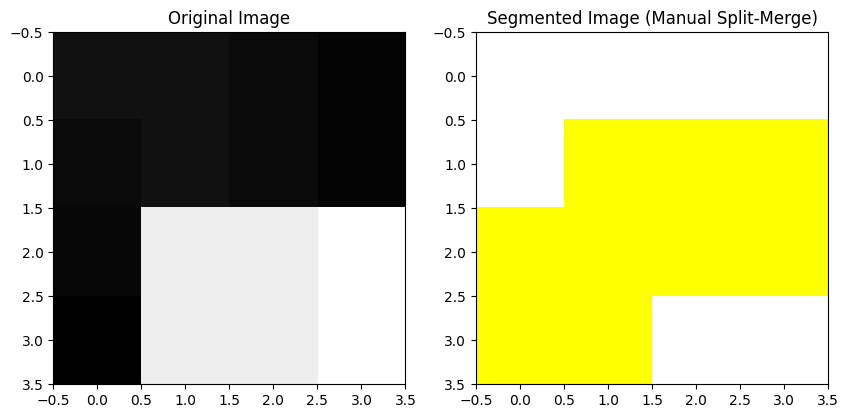

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from skimage import color

image = np.array([
    [7, 7, 5, 3],
    [5, 7, 5, 3],
    [4, 70, 70, 75],
    [2, 70, 70, 75]
], dtype=np.float32)

image_rgb = color.gray2rgb(image)

# SLIC algorithm for initial segmentation
segments_slic = slic(image_rgb, n_segments=4, compactness=10, sigma=1, start_label=1)

# Calculating mean intensity for each segment
unique_segments = np.unique(segments_slic)
mean_intensities = {seg: np.mean(image[segments_slic == seg]) for seg in unique_segments}

# merging segments based on their mean intensity
threshold = 50

merged_labels = np.zeros_like(segments_slic)
current_label = 1

for seg in unique_segments:
    if mean_intensities[seg] < threshold:
        merged_labels[segments_slic == seg] = 1
    else:
        merged_labels[segments_slic == seg] = 2


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(mark_boundaries(image_rgb, merged_labels))
ax[1].set_title('Segmented Image (Manual Split-Merge)')

plt.show()


##Optimal Thresholding

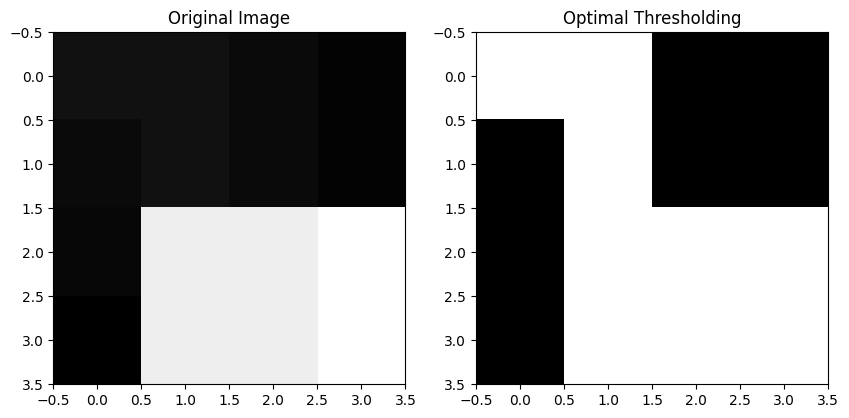

Optimal threshold value: 6.9902344


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Define the image
image = np.array([
    [7, 7, 5, 3],
    [5, 7, 5, 3],
    [4, 70, 70, 75],
    [2, 70, 70, 75]
], dtype=np.float32)

# optimal thresholding
thresh = threshold_otsu(image)
binary = image > thresh

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(binary, cmap='gray')
ax[1].set_title('Optimal Thresholding')

plt.show()

print("Optimal threshold value:", thresh)


##Agglomerative Clustering

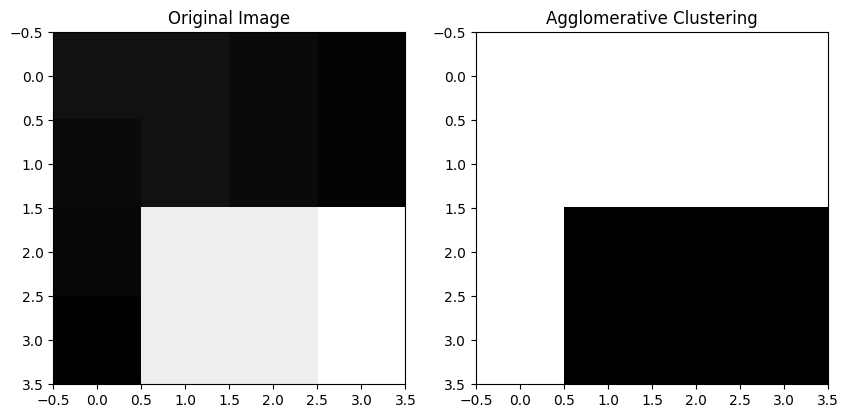

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Define the image
image = np.array([
    [7, 7, 5, 3],
    [5, 7, 5, 3],
    [4, 70, 70, 75],
    [2, 70, 70, 75]
], dtype=np.float32)

pixels = image.reshape(-1, 1)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2).fit(pixels)
labels = agglo.labels_.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='gray')
ax[1].set_title('Agglomerative Clustering')

plt.show()


#Question 3: Background Modeling by Median Filtering

In [ ]:
import numpy as np

frames = np.array([
    [
        [3, 255, 255, 2],
        [0, 250, 3, 3],
        [0, 251, 2, 7],
        [4, 254, 250, 4],
        [2, 254, 255, 3],
        [5, 255, 4, 5],
        [3, 250, 2, 7],
        [7, 253, 255, 1],
        [1, 2, 254, 255],
        [5, 4, 255, 3],
        [0, 5, 255, 2],
        [3, 3, 254, 255]
    ],
    [
        [3, 255, 255, 2],
        [0, 250, 3, 3],
        [0, 251, 2, 7],
        [4, 254, 250, 4],
        [2, 254, 255, 3],
        [5, 255, 4, 5],
        [3, 250, 2, 7],
        [7, 253, 255, 1],
        [1, 2, 254, 255],
        [5, 4, 255, 3],
        [0, 5, 255, 2],
        [3, 3, 254, 255]
    ],
    [
        [3, 255, 255, 2],
        [0, 250, 3, 3],
        [0, 251, 2, 7],
        [4, 254, 250, 4],
        [2, 254, 255, 3],
        [5, 255, 4, 5],
        [3, 250, 2, 7],
        [7, 253, 255, 1],
        [1, 2, 254, 255],
        [5, 4, 255, 3],
        [0, 5, 255, 2],
        [3, 3, 254, 255]
    ]
])

# median for each pixel across frames
background = np.median(frames, axis=0)

print("Background image by median filtering:\n", background)


Background image by median filtering:
 [[  3. 255. 255.   2.]
 [  0. 250.   3.   3.]
 [  0. 251.   2.   7.]
 [  4. 254. 250.   4.]
 [  2. 254. 255.   3.]
 [  5. 255.   4.   5.]
 [  3. 250.   2.   7.]
 [  7. 253. 255.   1.]
 [  1.   2. 254. 255.]
 [  5.   4. 255.   3.]
 [  0.   5. 255.   2.]
 [  3.   3. 254. 255.]]
